# Cryptocurrency Analysis: Bitcoin 2021 by Minute

* Unix Timestamp - This is the unix timestamp or also known as "Epoch Time". Use this to convert to your local timezone
* Date - This timestamp is in UTC datetime
* Symbol - The symbol for which the timeseries data refers
* Open - This is the opening price of the time period
* High - This is the highest price of the time period
* Low - This is the lowest price of the time period
* Close - This is the closing price of the time period
* Volume (Crypto) - This is the volume in the transacted Ccy. Ie. For BTC/USDT, this is in BTC amount
* Volume Base Ccy - This is the volume in the base/converted ccy. Ie. For BTC/USDT, this is in USDT amount
* Trade Count - This is the unique number of trades for the given time period

##  IN PROGRESS

In [1]:
library(tidyverse)
library(ggplot2)
library(ggcorrplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
bitcoin_analysis <- read_csv("/kaggle/input/bitcoin-prices-minutes-2020-2024/Binance_BTCUSDT_2021_minute.csv")

Rows: 524607 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): symbol
dbl  (11): unix, open, high, low, close, volume, volume_from, marketorder_vo...
dttm  (2): date, date_close

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Review Dataset

In [ ]:
colnames(bitcoin_analysis)
str(bitcoin_analysis)
head(bitcoin_analysis)
summary(bitcoin_analysis)
glimpse(bitcoin_analysis)

# Data Cleaning

## Check for missing values

In [ ]:
colSums(is.na(bitcoin_analysis))

## Remove Duplicates

In [3]:
bitcoin_analysis <- bitcoin_analysis %>% distinct()

## Clarify data types 

In [6]:
library(formattable)
bitcoin_analysis$volume_from <- currency(bitcoin_analysis$volume_from, digits = 0L)
bitcoin_analysis$marketorder_volume_from <- currency(bitcoin_analysis$marketorder_volume_from, digits = 0L)

# Data Visualization

## Closing Prices - Trend Analysis
### Distribution

*How many times did the cc close at each closing price?*

In [ ]:
ggplot(bitcoin_analysis, aes(x = `close`)) +
  geom_histogram(bins = 48, fill = "green", alpha = 0.7) +
  labs(title = "Distribution of Closing Price", x = "Close", y = "Frequency")

### Distribution by quartile

In [ ]:
# Create closing price quartile column
bitcoin_analysis <- within(bitcoin_analysis, quartile <- as.integer(cut(close, quantile(close, probs=0:4/4), include.lowest=TRUE)))

bitcoin_analysis %>%
group_by(quartile) %>%
ggplot(aes(x=close)) +
   geom_histogram(bins = 30, alpha = 0.7) +
   facet_wrap(~quartile)

### Volatility - Measured by Standard Deviation

In [ ]:
sd(bitcoin_analysis$close)
summary(bitcoin_analysis$close)

### Minute by Minute Movement

In [ ]:
ggplot(bitcoin_analysis, aes(x= date, y= close)) +
   geom_line() +
   labs(title="Price Fluctuation 2021", x="Date", y="Closing price")

### Hourly Movement

In [ ]:
# new column for time of day
bitcoin_analysis$by_time <- c(format(bitcoin_analysis$date,"%H"))
# hourly averages table
avg_hourly <- aggregate(bitcoin_analysis$close, list(bitcoin_analysis$by_time), FUN=mean)

ggplot(avg_hourly, aes(x= Group.1, y= x)) +
   geom_line(color="grey", aes(group=1)) +
   geom_point(shape=21, color="black", fill="#69b3a2", size=4) +
   labs(title="Hourly Price Fluctuation", x="Hour", y="Closing price")

### Weekly Movement

In [ ]:
# new column for week of the year
bitcoin_analysis$by_week <- c(format(bitcoin_analysis$date,"%W"))
# weekly averages table
avg_weekly <- aggregate(bitcoin_analysis$close, list(bitcoin_analysis$by_week), FUN=mean)

ggplot(avg_weekly, aes(x= Group.1, y= x)) +
   geom_line(color="grey", aes(group=1)) +
   geom_point(shape=21, color="black", fill="#69b3a2", size=4) +
   labs(title="Price Fluctuation by Week 2021", x="Week", y="Closing price")

### Monthly Movement

In [ ]:
# new column for month
bitcoin_analysis$by_month <- c(format(bitcoin_analysis$date,"%m"))
# monthly averages table
avg_monthly <- aggregate(bitcoin_analysis$close, list(bitcoin_analysis$by_month), FUN=mean)

ggplot(avg_monthly, aes(x= Group.1, y= x)) +
   geom_line(color="grey", aes(group=1)) +
   geom_point(shape=21, color="black", fill="#69b3a2", size=6) +
   labs(title="Price Fluctuation by Month 2021", x="Month", y="Closing price")

### Against Volume

In [ ]:
# Create volume quartile column
bitcoin_analysis <- within(bitcoin_analysis, quartile_vol <- as.integer(cut(volume, quantile(volume, probs=0:4/4), include.lowest=TRUE)))

bitcoin_analysis %>%
filter(quartile_vol == 1) %>%
ggplot(aes(x = `close`, y = `volume`)) +
  geom_point(alpha = 0.2) +
  labs(title = "Volume vs Closing Price: 1st Volume Quartile", x = "Volume", y = "Closing Price")

In [ ]:
bitcoin_analysis %>%
filter(quartile_vol == 2) %>%
ggplot(aes(x = `close`, y = `volume`)) +
  geom_point(alpha = 0.2) +
  labs(title = "Volume vs Closing Price: 2nd Volume Quartile", x = "Volume", y = "Closing Price")

bitcoin_analysis %>%
filter(quartile_vol == 3) %>%
ggplot(aes(x = `close`, y = `volume`)) +
  geom_point(alpha = 0.2) +
  labs(title = "Volume vs Closing Price: 3rd Volume Quartile", x = "Volume", y = "Closing Price")

bitcoin_analysis %>%
filter(quartile_vol == 4) %>%
ggplot(aes(x = `close`, y = `volume`)) +
  geom_point(alpha = 0.2) +
  labs(title = "Volume vs Closing Price: 4th Volume Quartile", x = "Volume", y = "Closing Price")

### Against Market Order Volume

In [ ]:
ggplot(bitcoin_analysis, aes(x= marketorder_volume, y= close)) +
   geom_point(alpha=.2) +
   labs(title="Marketorder volume vs Price 2021", x="Marketorder Volume", y="Closing price")

### Correlation to Volume

In [ ]:
# Correlation matrix
cor_matrix <- cor(bitcoin_analysis %>% select(`volume`, `close`), use = "complete.obs")

# Heatmap of correlation matrix
ggcorrplot(cor_matrix, method = "circle", lab = TRUE, lab_size = 4, title = "Correlation Matrix")

## Volume - Trend Analysis 

### Distribution

In [ ]:
ggplot(bitcoin_analysis, aes(x = `volume`)) +
  geom_histogram(bins = 25, fill = "blue", alpha = 0.7) +
  labs(title = "Distribution of Volume", x = "Volume", y = "Frequency")

In [ ]:
# eliminate outliers for zoomed in view

ggplot(bitcoin_analysis, aes(x = `volume`)) +
  geom_histogram(bins = 100, fill = "blue", alpha = 0.7) +
  xlim(NA, 200)
  labs(title = "Distribution of Volume", x = "Volume", y = "Frequency")

### Day of the Week Averages

In [ ]:
# new column for day of the week
bitcoin_analysis$by_weekday <- c(format(bitcoin_analysis$date,"%A"))
# weekday averages table
avg_weekday <- aggregate(bitcoin_analysis$volume, list(bitcoin_analysis$by_weekday), FUN=mean)

avg_weekday %>%
   mutate(Group.1 = factor(Group.1, levels = c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))) %>% 
   ggplot(aes(x= Group.1, y= x)) +
   geom_line(color="grey", aes(group=1)) +
   geom_point(shape=21, color="black", fill="#69b3a2", size=4) +
   labs(title="Weekday Volume Fluctuation", x="Day", y="Volume")


### Volume in USD vs Highest Price

In [ ]:
bitcoin_analysis %>%
group_by(quartile_vol) %>%
ggplot(aes(x= volume_from, y= high)) +
   geom_point(alpha=0.1) +
   facet_wrap(~quartile_vol)
   labs(title="Volume in USD v High", x="Volume in USD", y="High price")

## Market Activity - Tradecount

### By Minute

In [ ]:
ggplot(bitcoin_analysis, aes(x= date, y= tradecount)) +
   geom_line() +
   labs(title="Tradecount Change in 2021", x="Date", y="Tradecount")

### Against Highest Price - by quartiles

In [ ]:
bitcoin_analysis <- within(bitcoin_analysis, quartile_TD <- as.integer(cut(tradecount, quantile(tradecount, probs=0:4/4), include.lowest=TRUE)))

bitcoin_analysis %>%
filter(quartile_TD == 1) %>%
ggplot(aes(x = `tradecount`, y = `high`)) +
  geom_point(alpha = 0.2) +
  labs(title = "Tradecount vs Highest Price: 1st quartile", x = "High", y = "Tradecount")

In [ ]:
bitcoin_analysis %>%
filter(quartile_TD == 2) %>%
ggplot(aes(x = `tradecount`, y = `high`)) +
  geom_point(alpha = 0.2) +
  labs(title = "Tradecount vs Highest Price: 2nd quartile", x = "High", y = "Tradecount")

In [ ]:
bitcoin_analysis %>%
filter(quartile_TD == 3) %>%
ggplot(aes(x = `tradecount`, y = `high`)) +
  geom_point(alpha = 0.2) +
  labs(title = "Tradecount vs Highest Price: 3rd quartile", x = "High", y = "Tradecount")

In [ ]:
bitcoin_analysis %>%
filter(quartile_TD == 4) %>%
ggplot(aes(x = `tradecount`, y = `high`)) +
  geom_point(alpha = 0.2) +
  labs(title = "Tradecount vs Highest Price: 4th quartile", x = "High", y = "Tradecount")

## Moving Highest Price Averages 


In [ ]:
# Calculate 7-day Moving Average
bitcoin_analysis$SMA_7 <- zoo::rollmean(bitcoin_analysis$high, k = 7, fill = NA)

# Calculate 30-day Moving Average
bitcoin_analysis$SMA_30 <- zoo::rollmean(bitcoin_analysis$high, k = 30, fill = NA)

# Plotting the data
ggplot(data = bitcoin_analysis, aes(x = date)) +
  geom_line(aes(y = SMA_7, color = "7-day SMA")) +
  geom_line(aes(y = SMA_30, color = "30-day SMA")) +
  labs(title = "Bitcoin High Prices and Moving Averages",
       x = "Date",
       y = "Price",
       color = "Legend") +
  theme_minimal()


### Relative strength index RSI

In [ ]:
# Load necessary library
library(TTR)

# Calculate RSI with a 14-day period
bitcoin_analysis$RSI_14 <- RSI(bitcoin_analysis$high, n = 14)

# Plotting the RSI
ggplot(data = bitcoin_analysis, aes(x = date)) +
  geom_line(aes(y = RSI_14, color = "RSI (14-day)")) +
  labs(title = "Bitcoin RSI (14-day)",
       x = "Date",
       y = "RSI",
       color = "Legend") +
  geom_hline(yintercept = 70, linetype = "dashed", color = "red") +  # Overbought threshold
  geom_hline(yintercept = 30, linetype = "dashed", color = "blue") + # Oversold threshold
  theme_minimal()


### Candlestick patterns

In [ ]:
library("quantmod") 
chartSeries(bitcoin_analysis, name="Bitcoin")

# Convert your data frame to an xts object
bitcoin_xts <- xts(bitcoin_analysis[, c("open", "high", "low", "close")], order.by = bitcoin_analysis$date)

# Plot the candlestick chart
chartSeries(bitcoin_xts, type = "candlesticks", theme = chartTheme("white"))


candlestick aapl test

Warning message:
“The following aesthetics were dropped during statistical transformation: open,
high, low, close, and y.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: x,
open, high, low, close, and y.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“Using the `size` aesthetic in this geom was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` in the `default_aes` field and elsewhere instead.”


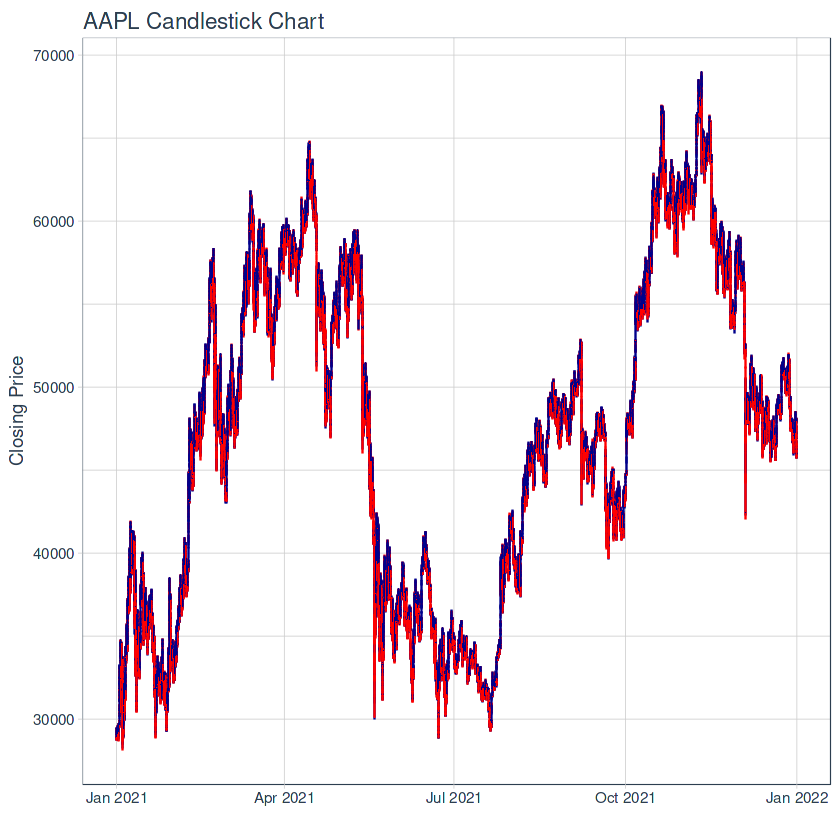

In [9]:
library(tidyquant)  
# Plotting the candlestick chart
p <- ggplot(data = bitcoin_analysis, aes(x = date, y = close)) +
  geom_candlestick(aes(open = open, high = high, low = low, close = close)) +
  labs(title = "Bitcoin Candlestick Chart",
       x = "Date",
       y = "Price") +
  theme_minimal()

bitcoin_analysis %>%
    ggplot(aes(x = date, y = close)) +
    geom_candlestick(aes(open = open, high = high, low = low, close = close)) +
    labs(title = "AAPL Candlestick Chart", y = "Closing Price", x = "") +
    theme_tq()

# Convert the ggplot to an interactive plotly chart
p_interactive <- ggplotly(p)

# Print the interactive plot
p_interactive
